# Importing Data manipulation and visualization libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Advertising dataset

In [2]:
ad_data=pd.read_csv('advertising.csv')

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()
ad_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Data visualization

Text(0.5, 0, 'Age')

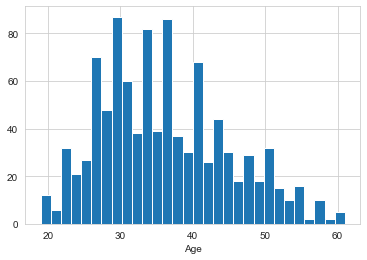

In [5]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

c:\users\ahsan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


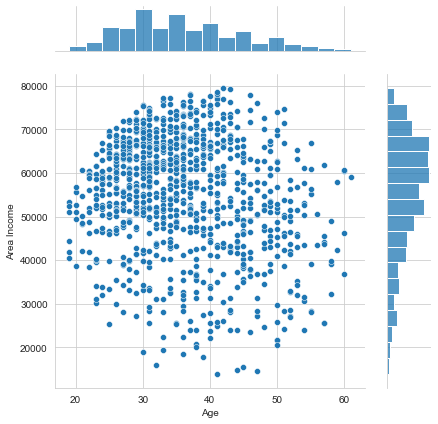

In [6]:
sns.set_style('whitegrid')
sns.jointplot('Age','Area Income',data=ad_data,space=0.5)

c:\users\ahsan\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


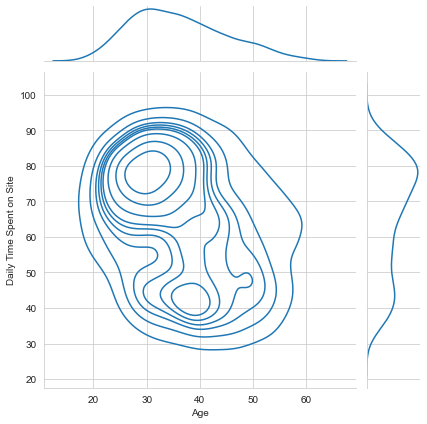

In [7]:
sns.jointplot('Age','Daily Time Spent on Site',data=ad_data,kind='kde')

# Adjusting data for training Logistics regression model

In [8]:
ad_data=ad_data.drop(['Ad Topic Line','City','Country'],axis=1)

In [9]:
from datetime import datetime
def SetT(col):
    dt=datetime.strptime(col,'%Y-%m-%d %H:%M:%S')
    return dt
ad_data["Timestamp"]=ad_data['Timestamp'].apply(SetT)

In [10]:
ad_data[['Month']]=ad_data['Timestamp'].apply(lambda x:x.month)
ad_data[['Year']]=ad_data['Timestamp'].apply(lambda x:x.year)
ad_data[['Day']]=ad_data['Timestamp'].apply(lambda x:x.day)
ad_data[['Hour']]=ad_data['Timestamp'].apply(lambda x:x.hour)
ad_data.drop('Timestamp',axis=1,inplace=True)

In [11]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Year,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,2016,27,0
1,80.23,31,68441.85,193.77,1,0,4,2016,4,1
2,69.47,26,59785.94,236.50,0,0,3,2016,13,20
3,74.15,29,54806.18,245.89,1,0,1,2016,10,2
4,68.37,35,73889.99,225.58,0,0,6,2016,3,3


<AxesSubplot:>

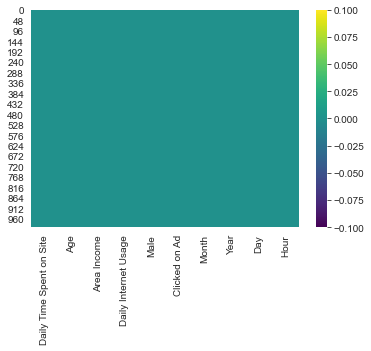

In [12]:
sns.heatmap(ad_data.isnull(),cmap='viridis')    #checking for missing values

# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(ad_data.drop('Clicked on Ad',axis=1),
                                ad_data['Clicked on Ad'], test_size=0.30, random_state=101)

# Training model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lgr=LogisticRegression()

In [17]:
lgr.fit(X_train,y_train)
predictions=lgr.predict(X_test)

# Predictions and evaluations

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       157
           1       0.98      0.97      0.97       143

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[154,   3],
       [  5, 138]], dtype=int64)